In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
print("Loading and preparing data...")
df = pd.read_csv("../data/final_model_dataset_v2.csv")

ignore_cols = ["cation", "cation_ion_name", "anion", "anion_ion_name"]
target_col = "CO2_solubility"
feature_cols = [col for col in df.columns if col not in ignore_cols + [target_col]]

X = df[feature_cols].values
y = df[target_col].values

Loading and preparing data...


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data preparation complete.")

Data preparation complete.


In [9]:
print("\nInitializing models...")
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


Initializing models...


In [ ]:
results = {}

print("--- Starting Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val_scaled)
    
    # Calculate R² and MAE
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    
    # Store the results
    results[name] = {"R²": r2, "MAE": mae}
    
    print(f"Results for {name}:")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")

# --- 4. Add Your Neural Network Results ---
# Add the results from your other notebook to the dictionary for comparison.
# From your script: R² was 0.9856
# From your script: The final validation MAE was ~0.017-0.018
results["Neural Network"] = {"R²": 0.9799817696916608, "MAE": 0.022511374460869725}

--- Starting Model Training and Evaluation ---

Training Ridge Regression...
Results for Ridge Regression:
  R²: 0.5906
  MAE: 0.1164

Training Random Forest...
Results for Random Forest:
  R²: 0.9854
  MAE: 0.0166

Training Gradient Boosting...
Results for Gradient Boosting:
  R²: 0.9730
  MAE: 0.0256



--- Final Model Comparison ---
                         R²       MAE
Neural Network     0.985600  0.017800
Random Forest      0.985382  0.016617
Gradient Boosting  0.973017  0.025581
Ridge Regression   0.590583  0.116408


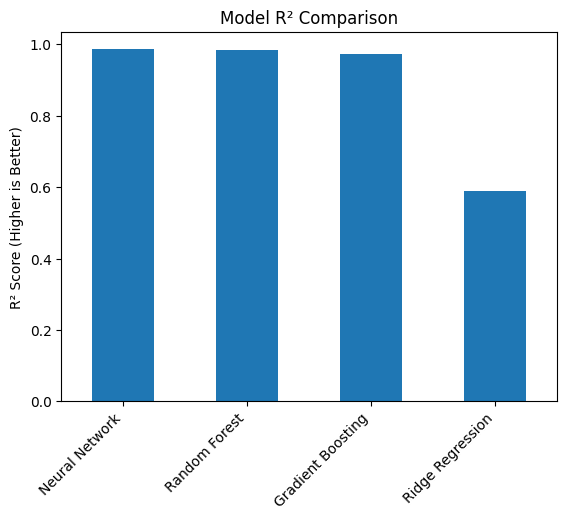

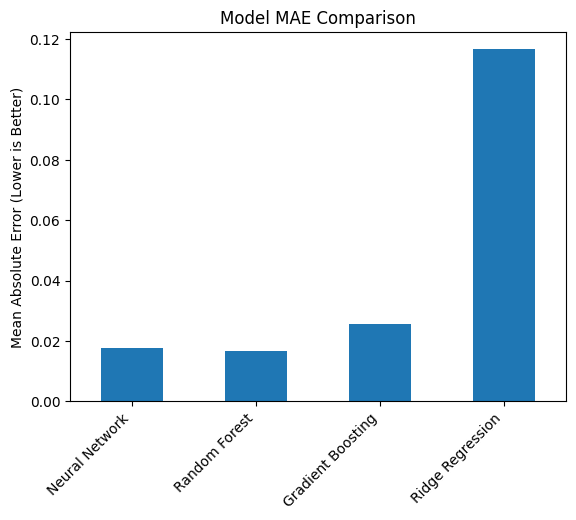

In [11]:
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)

print("\n--- Final Model Comparison ---")
print(results_df)

# Plot the comparison
results_df.plot(kind='bar', y='R²', title='Model R² Comparison', legend=False)
plt.ylabel('R² Score (Higher is Better)')
plt.xticks(rotation=45, ha='right')
plt.show()

results_df.plot(kind='bar', y='MAE', title='Model MAE Comparison', legend=False)
plt.ylabel('Mean Absolute Error (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.show()